본문12-01

In [7]:
!pip show kiwipiepy

Name: kiwipiepy
Version: 0.15.2
Summary: Kiwi, the Korean Tokenizer for Python
Home-page: https://github.com/bab2min/kiwipiepy
Author: bab2min
Author-email: bab2min@gmail.com
License: LGPL v3 License
Location: g:\programming\python\venv_py3913_rpa\lib\site-packages
Requires: dataclasses, kiwipiepy-model, numpy, tqdm
Required-by: 


본문12-02

In [17]:
from kiwipiepy import Kiwi

In [19]:
# NNG 일반명사, NNP 고유명사, VV 동사, VA 형용사
kiwi = Kiwi()
kiwi.tokenize("꿈의 거처")
kiwi.tokenize("달이 참 예쁘다고")

[Token(form='달', tag='NNG', start=0, len=1),
 Token(form='이', tag='JKS', start=1, len=1),
 Token(form='참', tag='MAG', start=3, len=1),
 Token(form='예쁘', tag='VA', start=5, len=2),
 Token(form='다고', tag='EC', start=7, len=2)]

In [20]:
kiwi.split_into_sents("여러 문장으로 구성된 텍스트네 이걸 분리해줘")

[Sentence(text='여러 문장으로 구성된 텍스트네', start=0, end=16, tokens=None, subs=[]),
 Sentence(text='이걸 분리해줘', start=17, end=24, tokens=None, subs=[])]

In [21]:
kiwi.split_into_sents("여러 문장으로 구성된 텍스트네 이걸 분리해줘", return_tokens=True)

[Sentence(text='여러 문장으로 구성된 텍스트네', start=0, end=16, tokens=[Token(form='여러', tag='MM', start=0, len=2), Token(form='문장', tag='NNG', start=3, len=2), Token(form='으로', tag='JKB', start=5, len=2), Token(form='구성', tag='NNG', start=8, len=2), Token(form='되', tag='XSV', start=10, len=1), Token(form='ᆫ', tag='ETM', start=10, len=1), Token(form='텍스트', tag='NNG', start=12, len=3), Token(form='이', tag='VCP', start=15, len=0), Token(form='네', tag='EF', start=15, len=1)], subs=[]),
 Sentence(text='이걸 분리해줘', start=17, end=24, tokens=[Token(form='이거', tag='NP', start=17, len=2), Token(form='ᆯ', tag='JKO', start=18, len=1), Token(form='분리', tag='NNG', start=20, len=2), Token(form='하', tag='XSV', start=22, len=1), Token(form='어', tag='EC', start=22, len=1), Token(form='주', tag='VX', start=23, len=1), Token(form='어', tag='EF', start=23, len=1)], subs=[])]

In [23]:
import collections

text = '내겐 멀쩡한 나침반이 없어 따라가 봐도 북극성은 없어 어디쯤인지 대체 알 수가 없어 희한한 것은 이젠 걱정이 없어 바늘 끝엔 항상 네가 있어 (있어) 있어 (있어) 이제 와 영혼의 방황 같은 건 됐어 (됐어) 됐어 난 오직 너에게로부터 쏟아지는 햇살을 굳혀 나침반 위에 눈보란 너에게서 그쳐 파묻힌 내 꿈의 거처는 아무래도 너여야 아무래도 너여야만 해'
# text='서기가  영원해도  난  마지막  나야  난  나라는  시대의  처음과  끝이야  난  나라는  인류의  기원과  종말이야  넌  나라는  마음의  유일한  무덤이야  넌  나라는  시계의  마지막  시침이야  난  나라는  우주의  빅뱅과  블랙홀이야  난  나라는  신화의  실체와  허구야  난  너의  이름을  닮은  집을 지을 거야'
list_sentence_tags = kiwi.tokenize(text)
print(len(sentece_tag))
list_sentence_tags

118


[Token(form='나', tag='NP', start=0, len=1),
 Token(form='에게', tag='JKB', start=1, len=1),
 Token(form='ᆫ', tag='JX', start=1, len=1),
 Token(form='멀쩡', tag='XR', start=3, len=2),
 Token(form='하', tag='XSA', start=5, len=1),
 Token(form='ᆫ', tag='ETM', start=5, len=1),
 Token(form='나침반', tag='NNG', start=7, len=3),
 Token(form='이', tag='JKS', start=10, len=1),
 Token(form='없', tag='VA', start=12, len=1),
 Token(form='어', tag='EC', start=13, len=1),
 Token(form='따라가', tag='VV', start=15, len=3),
 Token(form='어', tag='EC', start=17, len=1),
 Token(form='보', tag='VX', start=19, len=1),
 Token(form='어도', tag='EC', start=19, len=2),
 Token(form='북극성', tag='NNG', start=22, len=3),
 Token(form='은', tag='JX', start=25, len=1),
 Token(form='없', tag='VA', start=27, len=1),
 Token(form='어', tag='EC', start=28, len=1),
 Token(form='어디', tag='NP', start=30, len=2),
 Token(form='쯤', tag='XSN', start=32, len=1),
 Token(form='이', tag='VCP', start=33, len=1),
 Token(form='ᆫ지', tag='EC', start=33, len=2)

In [31]:
# NNG, NNP, VV, VA
list_sentence_tags[0].form, list_sentence_tags[0].tag

list_result = []
for idx in range(0, len(list_sentence_tags)):
    if list_sentence_tags[idx].tag in ['NNG', 'NNP', 'VA']:
        print(idx, list_sentence_tags[idx].form, list_sentence_tags[idx].tag)
        list_result.append(list_sentence_tags[idx].form)

list_count_result = collections.Counter(list_result)
list_top5 = list_count_result.most_common(5)
print(list_count_result)
print(list_top5)

6 나침반 NNG
8 없 VA
14 북극성 NNG
16 없 VA
27 없 VA
34 이제 NNG
36 걱정 NNG
38 없 VA
40 바늘 NNG
41 끝 NNG
50 있 VA
56 있 VA
59 이제 NNG
61 영혼 NNG
63 방황 NNG
64 같 VA
88 햇살 NNG
92 나침반 NNG
93 위 NNG
95 눈보라 NNG
105 꿈 NNG
107 거처 NNG
114 너여야 NNG
Counter({'없': 4, '나침반': 2, '이제': 2, '있': 2, '북극성': 1, '걱정': 1, '바늘': 1, '끝': 1, '영혼': 1, '방황': 1, '같': 1, '햇살': 1, '위': 1, '눈보라': 1, '꿈': 1, '거처': 1, '너여야': 1})
[('없', 4), ('나침반', 2), ('이제', 2), ('있', 2), ('북극성', 1)]


In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [38]:
wc = WordCloud(font_path='malgun', background_color='white', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(list_top5))

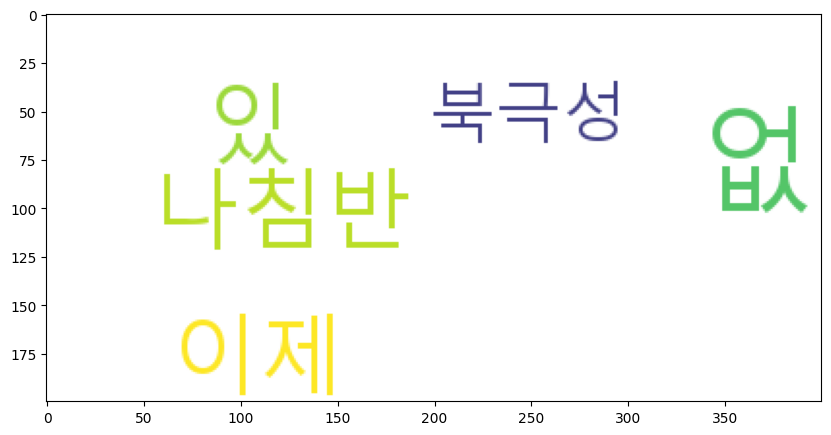

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

plt.imshow(cloud)

In [49]:
import pandas as pd
import os
file_path = './Data02/'
file_list = os.listdir(file_path)
print(file_list[2])

df_rawdata_movie_review = pd.read_table(file_path+file_list[2])

ratings_train.txt


In [50]:
df_rawdata_movie_review.info()
df_rawdata_movie_review

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [58]:
df_mod00_movie_review = df_rawdata_movie_review.dropna()
df_mod00_movie_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [59]:
df_mod00_movie_review['document'] = df_mod00_movie_review['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')

C:\Users\leadl\AppData\Local\Temp\ipykernel_22596\3214047092.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mod00_movie_review['document'] = df_mod00_movie_review['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
C:\Users\leadl\AppData\Local\Temp\ipykernel_22596\3214047092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod00_movie_review['document'] = df_mod00_movie_review['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')


In [60]:
df_mod00_movie_review

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0
149996,8549745,평점이 너무 낮아서,1
149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,2376369,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [69]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords()

In [70]:
# NNG, NNP, VV, VA
list_result = []
for sentence in df_mod00_movie_review.iloc[:10000, 1]:
    list_sentence_tags = kiwi.tokenize(sentence, stopwords=stopwords)
    for idx in range(0, len(list_sentence_tags)):
        if list_sentence_tags[idx].tag in ['NNG', 'NNP', 'VA']:
            # print(idx, list_sentence_tags[idx].form, list_sentence_tags[idx].tag)
            list_result.append(list_sentence_tags[idx].form)

list_count_result = collections.Counter(list_result)
list_top10 = list_count_result.most_common(10)
print(list_count_result)
print(list_top10)

Counter({'영화': 3879, '좋': 756, '재밌': 616, '연기': 511, '있': 493, '최고': 457, '평점': 423, '점': 382, '스토리': 363, '드라마': 359, '생각': 326, '감동': 319, '감독': 310, '배우': 298, '내용': 294, '시간': 286, '재미': 282, '재미없': 261, '재미있': 244, '쓰레기': 229, '작품': 226, '사랑': 223, '액션': 197, '정도': 194, '그렇': 182, '마지막': 173, '돈': 164, '기대': 163, '느낌': 160, '이렇': 159, '최악': 156, '많': 154, '장면': 153, '이야기': 145, '명작': 142, '주인공': 141, '처음': 135, '끝': 134, '연출': 134, '잼': 124, '이해': 120, '기억': 120, '이상': 119, '괜찮': 119, '한국': 118, '인생': 115, '멋지': 115, '결말': 114, '여자': 114, '남자': 113, '소재': 111, '짜증': 108, '개': 108, '마음': 107, '애': 104, '매력': 103, '실망': 103, '필요': 102, '가슴': 99, '인간': 98, '일본': 97, '속': 96, '어리': 96, '전개': 95, '전': 95, '현실': 93, '높': 91, '공포': 91, '지루하': 90, '굿': 89, '크': 88, '코미디': 86, '눈물': 85, '반전': 85, '낮': 83, '개봉': 83, '슬프': 82, '캐릭터': 81, '음악': 80, '아이': 80, '공감': 79, '자체': 79, '추천': 78, '수준': 76, '어떻': 76, '지금': 75, '제목': 74, '가족': 73, '몰입': 73, '연기력': 71, '여운': 71, '표현': 71, '작가': 67, '작': 

In [71]:
wc = WordCloud(font_path='malgun', background_color='white', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(list_count_result))

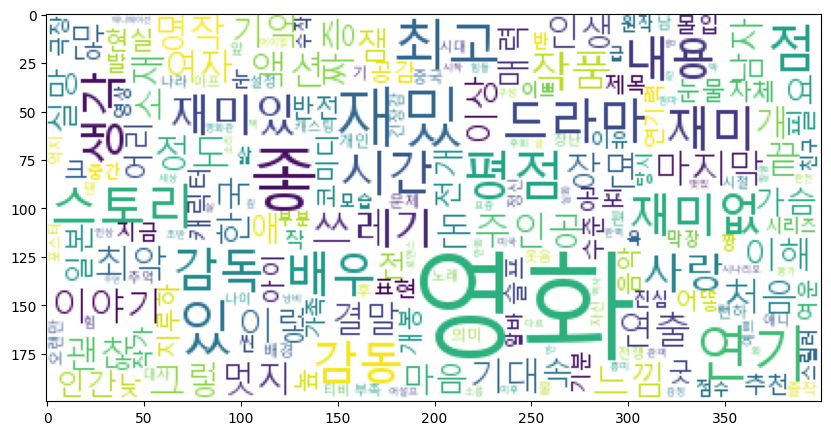

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

plt.imshow(cloud)

In [75]:
file_path = './Data02/'
file_list = os.listdir(file_path)
print(file_list[1])

df_rawdata_comment_rank = pd.read_csv(file_path+file_list[1])

comment_rank.csv


In [76]:
df_rawdata_comment_rank.info()
df_rawdata_comment_rank

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  990 non-null    int64 
 1   movie       990 non-null    object
 2   comment     891 non-null    object
 3   rank        990 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.1+ KB


,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
2,2,롱 리브 더 킹: 목포 영웅,NaN,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10
...,...,...,...,...
985,985,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,10
986,986,롱 리브 더 킹: 목포 영웅,NaN,10
987,987,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,8
988,988,아수라,찢었다...모든게 찢었다.,9


In [78]:
df_rawdata_comment_rank.groupby('movie')['rank'].agg(['mean', 'count'])

,mean,count
movie,,
고양이 집사,8.678947,190
롱 리브 더 킹: 목포 영웅,10.000000,99
매트릭스,10.000000,8
미드소마,9.285714,84
비바리움,9.095238,84
서복,9.319149,47
싱크홀,9.838384,99
아수라,9.616162,99
어메이징 스파이더맨,9.711538,52


In [80]:
df_mod00_comment_rank = df_rawdata_comment_rank.dropna()
df_mod00_comment_rank.groupby('movie')['rank'].agg(['mean', 'count'])

,mean,count
movie,,
고양이 집사,8.678947,190
매트릭스,10.000000,8
미드소마,9.285714,84
비바리움,9.095238,84
서복,9.319149,47
싱크홀,9.838384,99
아수라,9.616162,99
어메이징 스파이더맨,9.711538,52
언포기버블,7.535354,99


In [90]:
df_mod01_comment_rank = df_mod00_comment_rank[df_mod00_comment_rank['movie'] == '인질'].reset_index(drop=True)
df_mod01_comment_rank

,Unnamed: 0,movie,comment,rank
0,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
1,9,인질,진짜 할거없으신뷴들은 보세요. ^^ 시간이 넘 아까운...,10
2,11,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
3,19,인질,진짜 할거없으신뷴들은 보세요. ^^ 시간이 넘 아까운...,10
4,21,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
...,...,...,...,...
124,965,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,10
125,971,인질,재미있게 봤습니다.,10
126,975,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,10
127,981,인질,재미있게 봤습니다.,10


In [91]:
# NNG, NNP, VV, VA
list_result = []
for sentence in df_mod01_comment_rank.iloc[:, 2]:
    list_sentence_tags = kiwi.tokenize(sentence, stopwords=stopwords)
    for idx in range(0, len(list_sentence_tags)):
        if list_sentence_tags[idx].tag in ['NNG', 'NNP', 'VA']:
            # print(idx, list_sentence_tags[idx].form, list_sentence_tags[idx].tag)
            list_result.append(list_sentence_tags[idx].form)

list_count_result = collections.Counter(list_result)
list_top10 = list_count_result.most_common(10)
print(list_count_result)
print(list_top10)

Counter({'납치범': 99, '대가리': 99, '영화': 99, '다조지네': 99, '집중': 99, '뷰': 15, '시간': 15, '재미있': 15})
[('납치범', 99), ('대가리', 99), ('영화', 99), ('다조지네', 99), ('집중', 99), ('뷰', 15), ('시간', 15), ('재미있', 15)]


In [94]:
wc = WordCloud(font_path='malgun', background_color='white', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(list_count_result))

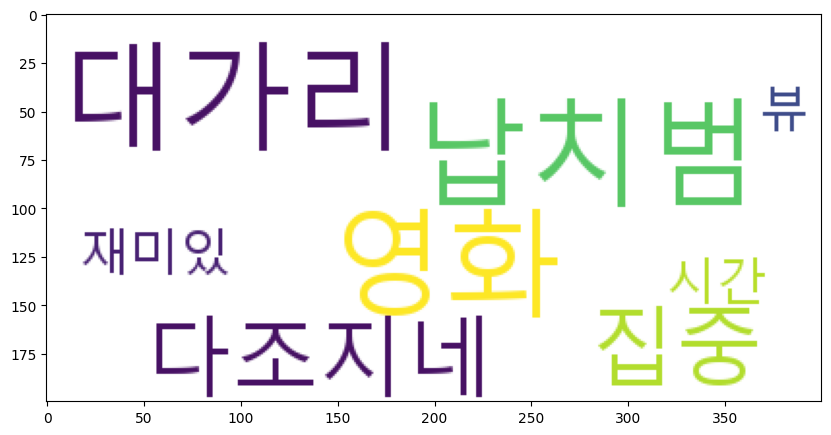

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

plt.imshow(cloud)